In [9]:
#import the libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load the data 
cab_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cab_rides.csv")

In [12]:
#It the header of data
#In the we can see the column of data
cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [13]:
#checking the null value
cab_df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [14]:
# We see that price column has 55095 rows missing data. 
#Total rows we have 693071 so we can remove the rows with no price.
cab_df.dropna(inplace=True)

#Againg seeing that null value
cab_df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [15]:
# First, lets see what columns do we have
cab_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [16]:
# We don't need    id    product_id    surge_multiplier. So lets get rid of them
cab_df = cab_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price', 'name']]

cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,Lyft XL


In [17]:
# We see that time_stamp is Unix, so we need to convert it to the readable form.
# Using the time_stamp column, lets convert it to date, week day, hour and time of day.


cab_df["rounded_timestamp"] = cab_df["time_stamp"] / 1000
cab_df["rounded_timestamp"] = cab_df["rounded_timestamp"].apply(np.floor)

In [18]:
#we are creating four different column

cab_df["date"] = cab_df["rounded_timestamp"].apply(lambda x : datetime.fromtimestamp(x).date())
cab_df["time"] = cab_df["rounded_timestamp"].apply(lambda x: datetime.fromtimestamp(x).time())
cab_df['weekday'] = cab_df['date'].apply(lambda x: x.weekday())
cab_df["weekday"] = cab_df["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
cab_df['hour'] = cab_df['time'].apply(lambda time: time.hour)

In [19]:
#see the date
cab_df['date'].head()

0    2018-12-16
1    2018-11-27
2    2018-11-28
3    2018-11-30
4    2018-11-29
Name: date, dtype: object

In [20]:
#see the time
cab_df['time'].head()

0    09:30:07
1    02:00:23
2    01:00:22
3    04:53:02
4    03:49:20
Name: time, dtype: object

In [21]:
# We calculate time of day into: Morning,Afternoon,Evening and Night

cab_df.loc[(cab_df.hour >= 6) & (cab_df.hour < 12) , 'time_of_day'] = 'Morning'
cab_df.loc[(cab_df.hour >= 12) & (cab_df.hour < 16) , 'time_of_day'] = 'Afternoon'
cab_df.loc[(cab_df.hour >= 16) & (cab_df.hour < 22) , 'time_of_day'] = 'Evening'
cab_df.loc[(cab_df.hour >= 22) | (cab_df.hour < 6) , 'time_of_day'] = 'Night'

In [22]:
#After adding  column 'date', 'time','weekday', 'hour', 'time_of_day' see that
cab_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'name', 'rounded_timestamp', 'date', 'time', 'weekday', 'hour',
       'time_of_day'],
      dtype='object')

In [23]:
#need of column which is required for uber visualization
cab_df = cab_df[['distance', 'cab_type', 'time_stamp', 'price', 'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]

In [24]:
#if you want this new data set then use with conver of date and time from unix format
cab_df.to_csv("new.csv")

In [25]:
cab_df.head()

,distance,cab_type,time_stamp,price,name,date,time,weekday,hour,time_of_day
0,0.44,Lyft,1544952607890,5.0,Shared,2018-12-16,09:30:07,Sunday,9,Morning
1,0.44,Lyft,1543284023677,11.0,Lux,2018-11-27,02:00:23,Tuesday,2,Night
2,0.44,Lyft,1543366822198,7.0,Lyft,2018-11-28,01:00:22,Wednesday,1,Night
3,0.44,Lyft,1543553582749,26.0,Lux Black XL,2018-11-30,04:53:02,Friday,4,Night
4,0.44,Lyft,1543463360223,9.0,Lyft XL,2018-11-29,03:49:20,Thursday,3,Night


In [32]:
cab_df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [26]:
#see the sift of time 
cab_df['time_of_day'].value_counts()

Night        213603
Evening      159584
Morning      152951
Afternoon    111838
Name: time_of_day, dtype: int64

In [27]:
# So we can see we have two cab types: Uber and Lyft
# So we need to separate the datasets

uber_df = cab_df[cab_df['cab_type'] =="Uber"]
lyft_df = cab_df[cab_df['cab_type'] =="Lyft"]

In [28]:
# From above we see that for Uber we have only one value of price
# So we consider the price for uber only and plot which day it is highest. 
# We only consider the price > 1.


high_price_dataset = uber_df[uber_df["price"]>1]

high_distance_dataset = uber_df[uber_df["distance"]> 0.1]


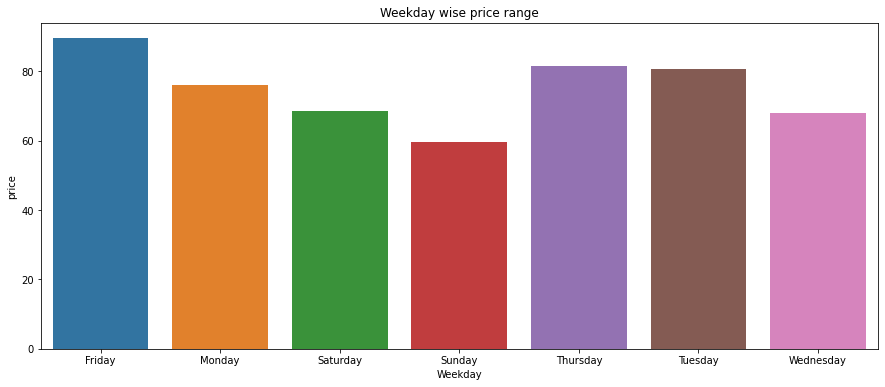

In [29]:
t_high_price = pd.DataFrame(high_price_dataset.groupby(["weekday", "price"]).size().reset_index())
t_high_price.columns = ["Weekday", "price","hour"]
plt.figure(figsize=(15, 6))
sns.barplot(x="Weekday", y="price", data=t_high_price,ci=None,estimator=np.max).set_title("Weekday wise price range");

In [30]:
t_high_price.groupby("Weekday").price.describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
Friday,110.0,33.050000,18.510343,4.5,18.125,31.75,45.375,89.5
Monday,113.0,32.898230,17.100694,4.5,18.500,32.50,46.500,76.0
Saturday,103.0,30.490291,15.727923,4.5,17.250,30.00,43.250,68.5
Sunday,107.0,31.219626,15.860860,4.5,17.750,31.00,44.250,59.5
Thursday,105.0,31.438095,16.917744,4.5,17.500,30.50,44.000,81.5
Tuesday,109.0,31.903670,16.600909,4.5,18.000,31.50,45.000,80.5
Wednesday,108.0,31.555556,16.186173,4.5,17.875,31.25,44.625,68.0


In [ ]:
#t_high_price1 = pd.DataFrame(high_price_dataset.groupby(["weekday", "price","name"]).size().reset_index())
#t_high_price1.columns = ["Weekday", "price","name","count"]
#plt.figure(figsize=(22, 5))
#sns.barplot(x="Weekday", y="price", hue="name", data=t_high_price1,ci=None,estimator=np.mean).set_title("Weekday wise Surge");

t_high_price1 = pd.DataFrame(high_price_dataset.groupby(["weekday", "price","name"]).size().reset_index())
t_high_price1.columns = ["Weekday", "price","name","count"]
plt.figure(figsize=(22, 5))
sns.barplot(x="Weekday", y="count", hue="name", data=t_high_price1,ci=None,estimator=np.mean).set_title("Weekday wise Surge")#;

In [33]:
td_high_day = pd.DataFrame(high_distance_dataset.groupby(["weekday","time_of_day"]).size().reset_index())
td_high_day.columns = ["Weekday", "Time of Day", "Count"]

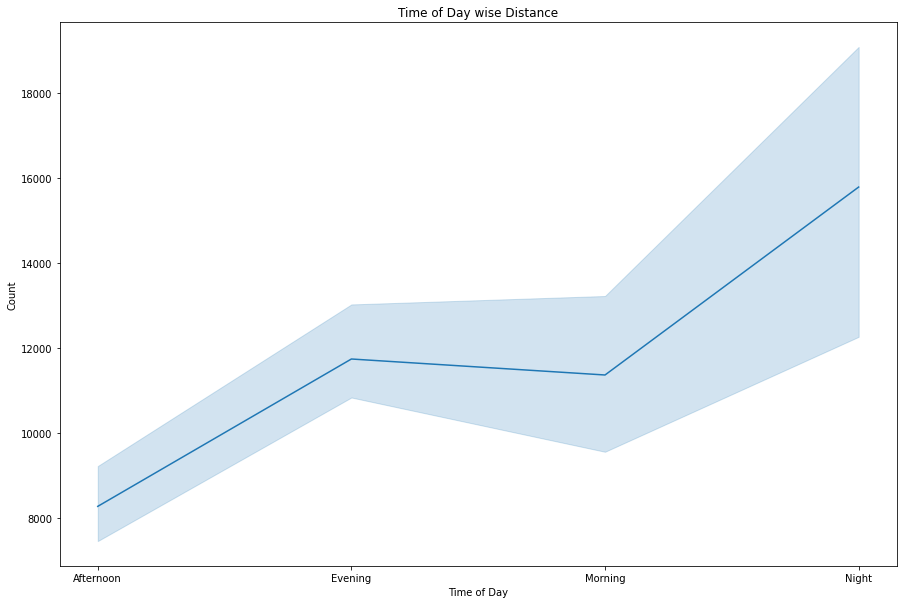

In [34]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="Time of Day", y="Count", data=td_high_day).set_title("Time of Day wise Distance");

In [35]:
td_high_day = pd.DataFrame(high_distance_dataset.groupby(["weekday","name","time_of_day"]).size().reset_index())
td_high_day.columns = ["Weekday", "name","Time of Day", "Count"]

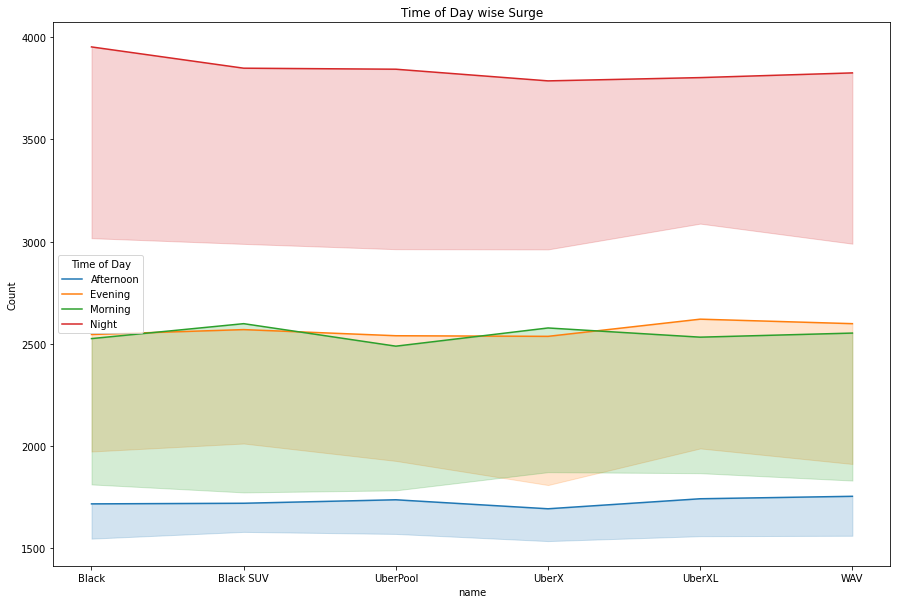

In [39]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="name", y="Count",hue="Time of Day",data=td_high_day,estimator=np.max).set_title("Time of Day wise Surge");